Missing values in merged dataset:
Country_Standardized         0
total_contributors           0
total_stars                  0
avg_stars_per_contributor    0
GDP                          5
GDP_per_capita               5
dtype: int64
Correlation between total contributors and GDP in 2023: 0.9030825488481744
Correlation between total stars and GDP in 2023: 0.9089448641957527
Correlation between average stars per contributor and GDP in 2023: 0.02075445611358036
Correlation between total contributors and GDP per capita in 2023: 0.20410214684183683
Correlation between total stars and GDP per capita in 2023: 0.19968809933205772
Correlation between average stars per contributor and GDP per capita in 2023: 0.27271552047253694


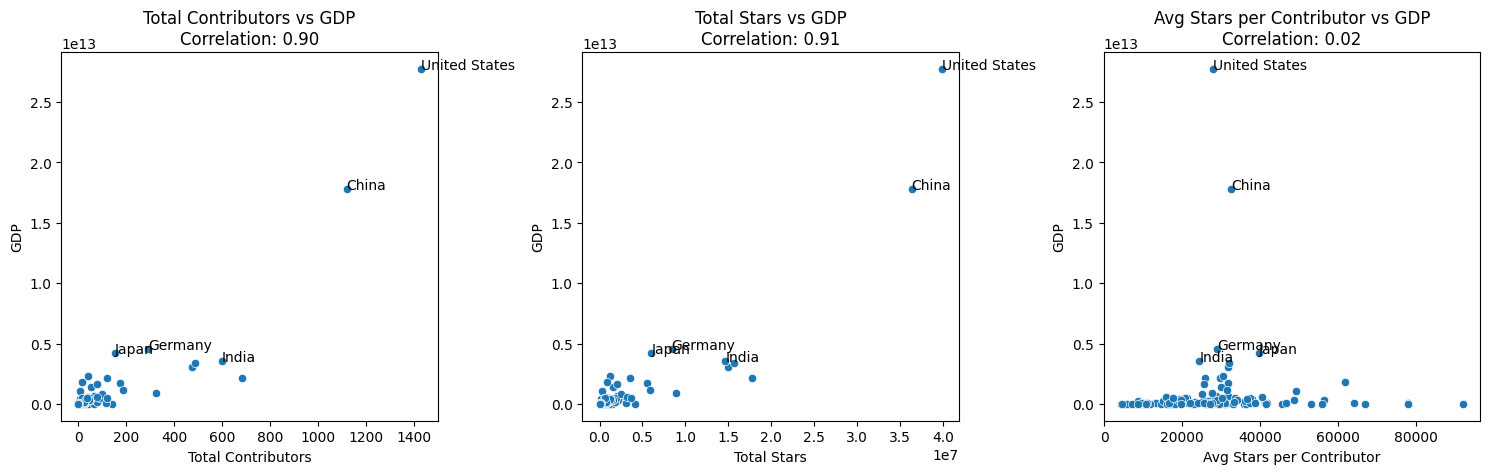

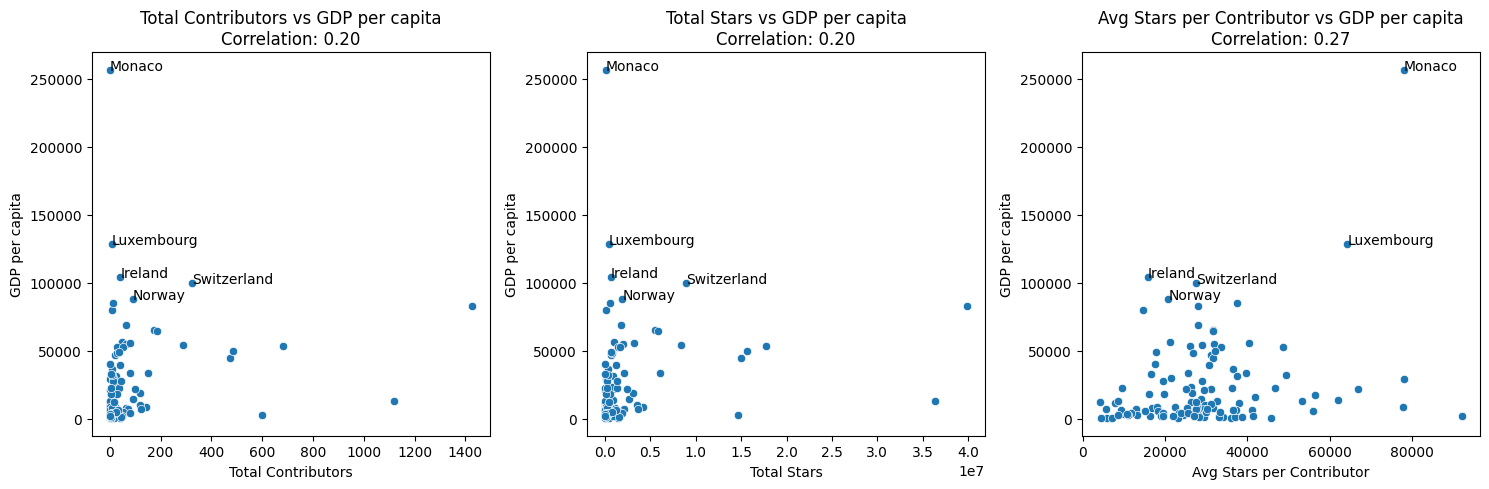

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

country_data = pd.read_csv('country_data.csv')
gdp_data = pd.read_csv('GDP.csv')
gdp_per_capita_data = pd.read_csv('GDP_per_capita.csv')

gdp_data_2023 = gdp_data[['Country Name', '2023']]
gdp_data_2023 = gdp_data_2023.rename(columns={'Country Name': 'Country_Standardized', '2023': 'GDP'})
gdp_per_capita_data_2023 = gdp_per_capita_data[['Country Name', '2023']]
gdp_per_capita_data_2023 = gdp_per_capita_data_2023.rename(columns={'Country Name': 'Country_Standardized', '2023': 'GDP_per_capita'})

final_data = pd.merge(country_data, gdp_data_2023, on='Country_Standardized', how='inner')
final_data = pd.merge(final_data, gdp_per_capita_data_2023, on='Country_Standardized', how='inner')

print("Missing values in merged dataset:")
print(final_data.isnull().sum())

final_data = final_data.dropna()

final_data['total_contributors'] = pd.to_numeric(final_data['total_contributors'], errors='coerce')
final_data['total_stars'] = pd.to_numeric(final_data['total_stars'], errors='coerce')
final_data['avg_stars_per_contributor'] = pd.to_numeric(final_data['avg_stars_per_contributor'], errors='coerce')
final_data['GDP'] = pd.to_numeric(final_data['GDP'], errors='coerce')
final_data['GDP_per_capita'] = pd.to_numeric(final_data['GDP_per_capita'], errors='coerce')

correlation_contributors_gdp = final_data['total_contributors'].corr(final_data['GDP'])
correlation_stars_gdp = final_data['total_stars'].corr(final_data['GDP'])
correlation_avg_stars_gdp = final_data['avg_stars_per_contributor'].corr(final_data['GDP'])

correlation_contributors_gdp_per_capita = final_data['total_contributors'].corr(final_data['GDP_per_capita'])
correlation_stars_gdp_per_capita = final_data['total_stars'].corr(final_data['GDP_per_capita'])
correlation_avg_stars_gdp_per_capita = final_data['avg_stars_per_contributor'].corr(final_data['GDP_per_capita'])

print(f"Correlation between total contributors and GDP in 2023: {correlation_contributors_gdp}")
print(f"Correlation between total stars and GDP in 2023: {correlation_stars_gdp}")
print(f"Correlation between average stars per contributor and GDP in 2023: {correlation_avg_stars_gdp}")

print(f"Correlation between total contributors and GDP per capita in 2023: {correlation_contributors_gdp_per_capita}")
print(f"Correlation between total stars and GDP per capita in 2023: {correlation_stars_gdp_per_capita}")
print(f"Correlation between average stars per contributor and GDP per capita in 2023: {correlation_avg_stars_gdp_per_capita}")

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='total_contributors', y='GDP', data=final_data)
plt.title(f'Total Contributors vs GDP\nCorrelation: {correlation_contributors_gdp:.2f}')
plt.xlabel('Total Contributors')
plt.ylabel('GDP')
top_5_contributors_gdp = final_data.nlargest(5, 'GDP')
for i in range(top_5_contributors_gdp.shape[0]):
    plt.text(top_5_contributors_gdp['total_contributors'].iloc[i], top_5_contributors_gdp['GDP'].iloc[i], top_5_contributors_gdp['Country_Standardized'].iloc[i])
plt.subplot(1, 3, 2)
sns.scatterplot(x='total_stars', y='GDP', data=final_data)
plt.title(f'Total Stars vs GDP\nCorrelation: {correlation_stars_gdp:.2f}')
plt.xlabel('Total Stars')
plt.ylabel('GDP')
top_5_stars_gdp = final_data.nlargest(5, 'GDP')
for i in range(top_5_stars_gdp.shape[0]):
    plt.text(top_5_stars_gdp['total_stars'].iloc[i], top_5_stars_gdp['GDP'].iloc[i], top_5_stars_gdp['Country_Standardized'].iloc[i])
plt.subplot(1, 3, 3)
sns.scatterplot(x='avg_stars_per_contributor', y='GDP', data=final_data)
plt.title(f'Avg Stars per Contributor vs GDP\nCorrelation: {correlation_avg_stars_gdp:.2f}')
plt.xlabel('Avg Stars per Contributor')
plt.ylabel('GDP')
top_5_avg_stars_gdp = final_data.nlargest(5, 'GDP')
for i in range(top_5_avg_stars_gdp.shape[0]):
    plt.text(top_5_avg_stars_gdp['avg_stars_per_contributor'].iloc[i], top_5_avg_stars_gdp['GDP'].iloc[i], top_5_avg_stars_gdp['Country_Standardized'].iloc[i])
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='total_contributors', y='GDP_per_capita', data=final_data)
plt.title(f'Total Contributors vs GDP per capita\nCorrelation: {correlation_contributors_gdp_per_capita:.2f}')
plt.xlabel('Total Contributors')
plt.ylabel('GDP per capita')
top_5_contributors_gdp_per_capita = final_data.nlargest(5, 'GDP_per_capita')
for i in range(top_5_contributors_gdp_per_capita.shape[0]):
    plt.text(top_5_contributors_gdp_per_capita['total_contributors'].iloc[i], top_5_contributors_gdp_per_capita['GDP_per_capita'].iloc[i], top_5_contributors_gdp_per_capita['Country_Standardized'].iloc[i])
plt.subplot(1, 3, 2)
sns.scatterplot(x='total_stars', y='GDP_per_capita', data=final_data)
plt.title(f'Total Stars vs GDP per capita\nCorrelation: {correlation_stars_gdp_per_capita:.2f}')
plt.xlabel('Total Stars')
plt.ylabel('GDP per capita')
top_5_stars_gdp_per_capita = final_data.nlargest(5, 'GDP_per_capita')
for i in range(top_5_stars_gdp_per_capita.shape[0]):
    plt.text(top_5_stars_gdp_per_capita['total_stars'].iloc[i], top_5_stars_gdp_per_capita['GDP_per_capita'].iloc[i], top_5_stars_gdp_per_capita['Country_Standardized'].iloc[i])
plt.subplot(1, 3, 3)
sns.scatterplot(x='avg_stars_per_contributor', y='GDP_per_capita', data=final_data)
plt.title(f'Avg Stars per Contributor vs GDP per capita\nCorrelation: {correlation_avg_stars_gdp_per_capita:.2f}')
plt.xlabel('Avg Stars per Contributor')
plt.ylabel('GDP per capita')
top_5_avg_stars_gdp_per_capita = final_data.nlargest(5, 'GDP_per_capita')
for i in range(top_5_avg_stars_gdp_per_capita.shape[0]):
    plt.text(top_5_avg_stars_gdp_per_capita['avg_stars_per_contributor'].iloc[i], top_5_avg_stars_gdp_per_capita['GDP_per_capita'].iloc[i], top_5_avg_stars_gdp_per_capita['Country_Standardized'].iloc[i])
plt.tight_layout()
plt.show()

Correlation between total contributors and number of articles in 2023: 0.5692259129410604
Correlation between total stars and number of articles in 2023: 0.572241195754739
Correlation between average stars per contributor and number of articles in 2023: 0.02286201513768722


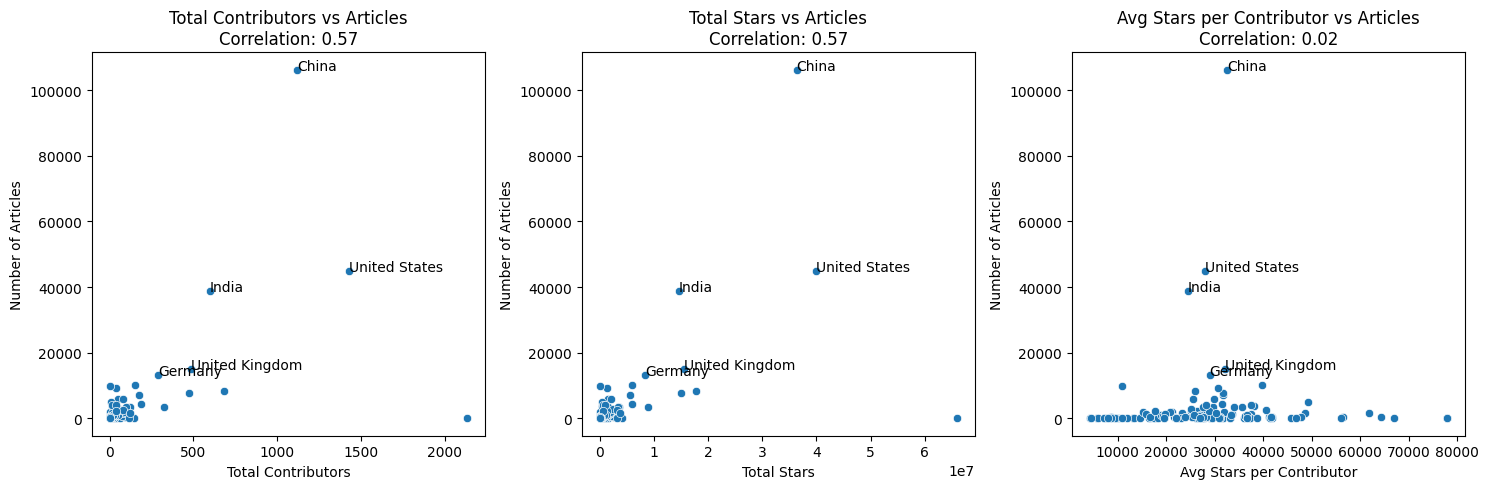

In [ ]:
publication_data = pd.read_csv('publication_AI.csv')

publication_data['Entity'] = publication_data['Entity'].str.strip()
merged_data = pd.merge(country_data, publication_data, left_on='Country_Standardized', right_on='Entity', how='inner')
data_2023 = merged_data[merged_data['Year'] == 2023]

correlation_contributors = data_2023['total_contributors'].corr(data_2023['Number of articles - Field: All'])
correlation_stars = data_2023['total_stars'].corr(data_2023['Number of articles - Field: All'])
correlation_avg_stars = data_2023['avg_stars_per_contributor'].corr(data_2023['Number of articles - Field: All'])

print(f"Correlation between total contributors and number of articles in 2023: {correlation_contributors}")
print(f"Correlation between total stars and number of articles in 2023: {correlation_stars}")
print(f"Correlation between average stars per contributor and number of articles in 2023: {correlation_avg_stars}")

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='total_contributors', y='Number of articles - Field: All', data=data_2023)
plt.title(f'Total Contributors vs Articles\nCorrelation: {correlation_contributors:.2f}')
plt.xlabel('Total Contributors')
plt.ylabel('Number of Articles')
top_5_contributors = data_2023.nlargest(5, "Number of articles - Field: All")
for i in range(top_5_contributors.shape[0]):
    plt.text(top_5_contributors["total_contributors"].iloc[i], top_5_contributors["Number of articles - Field: All"].iloc[i], top_5_contributors["Country_Standardized"].iloc[i])
plt.subplot(1, 3, 2)
sns.scatterplot(x='total_stars', y='Number of articles - Field: All', data=data_2023)
plt.title(f'Total Stars vs Articles\nCorrelation: {correlation_stars:.2f}')
plt.xlabel('Total Stars')
plt.ylabel('Number of Articles')
top_5_stars = data_2023.nlargest(5, "Number of articles - Field: All")
for i in range(top_5_stars.shape[0]):
    plt.text(top_5_stars["total_stars"].iloc[i], top_5_stars["Number of articles - Field: All"].iloc[i], top_5_stars["Country_Standardized"].iloc[i])
plt.subplot(1, 3, 3)
sns.scatterplot(x='avg_stars_per_contributor', y='Number of articles - Field: All', data=data_2023)
plt.title(f'Avg Stars per Contributor vs Articles\nCorrelation: {correlation_avg_stars:.2f}')
plt.xlabel('Avg Stars per Contributor')
plt.ylabel('Number of Articles')
top_5_avg_stars = data_2023.nlargest(5, "Number of articles - Field: All")
for i in range(top_5_avg_stars.shape[0]):
    plt.text(top_5_avg_stars["avg_stars_per_contributor"].iloc[i], top_5_avg_stars["Number of articles - Field: All"].iloc[i], top_5_avg_stars["Country_Standardized"].iloc[i])
plt.tight_layout()
plt.show()

Missing values in merged dataset:
Country_Standardized         0
total_contributors           0
total_stars                  0
avg_stars_per_contributor    0
Code                         0
GERD                         0
dtype: int64
Correlation between total contributors and GERD in 2022: 0.3018749318002725
Correlation between total stars and GERD in 2022: 0.31676593229459477
Correlation between average stars per contributor and GERD in 2022: 0.060448486023847545


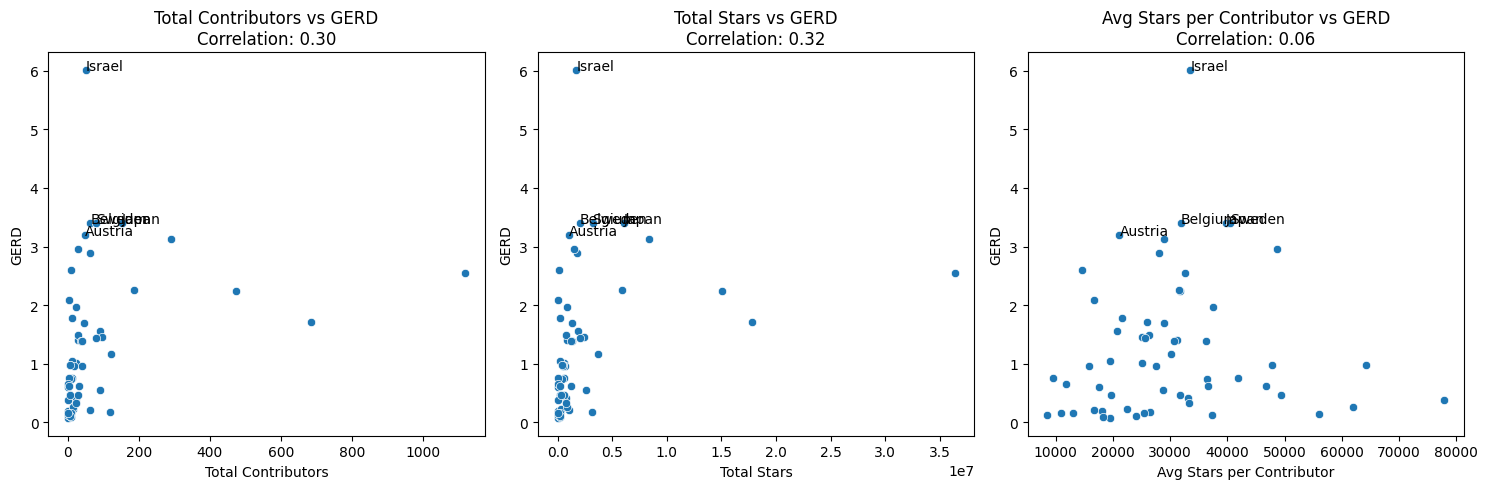

In [ ]:
from iso3166 import countries

gerd_data = pd.read_csv('GERD.csv')

country_name_to_code = {country.name: country.alpha3 for country in countries}
country_data['Code'] = country_data['Country_Standardized'].map(country_name_to_code)

gerd_data_2022 = gerd_data[(gerd_data['year'] == 2022) & (gerd_data['indicatorId'] == 'EXPGDP.TOT')]
gerd_data_2022 = gerd_data_2022.rename(columns={'geoUnit': 'Code', 'value': 'GERD'})

final_data = pd.merge(country_data, gerd_data_2022[['Code', 'GERD']], on='Code', how='inner')

print("Missing values in merged dataset:")
print(final_data.isnull().sum())

final_data = final_data.dropna()
final_data['total_contributors'] = pd.to_numeric(final_data['total_contributors'], errors='coerce')
final_data['total_stars'] = pd.to_numeric(final_data['total_stars'], errors='coerce')
final_data['avg_stars_per_contributor'] = pd.to_numeric(final_data['avg_stars_per_contributor'], errors='coerce')
final_data['GERD'] = pd.to_numeric(final_data['GERD'], errors='coerce')

correlation_contributors = final_data['total_contributors'].corr(final_data['GERD'])
correlation_stars = final_data['total_stars'].corr(final_data['GERD'])
correlation_avg_stars = final_data['avg_stars_per_contributor'].corr(final_data['GERD'])

print(f"Correlation between total contributors and GERD in 2022: {correlation_contributors}")
print(f"Correlation between total stars and GERD in 2022: {correlation_stars}")
print(f"Correlation between average stars per contributor and GERD in 2022: {correlation_avg_stars}")

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='total_contributors', y='GERD', data=final_data)
plt.title(f'Total Contributors vs GERD\nCorrelation: {correlation_contributors:.2f}')
plt.xlabel('Total Contributors')
plt.ylabel('GERD')
top_5_contributors = final_data.nlargest(5, "GERD")
for i in range(top_5_contributors.shape[0]):
    plt.text(top_5_contributors["total_contributors"].iloc[i], top_5_contributors["GERD"].iloc[i], top_5_contributors["Country_Standardized"].iloc[i])
plt.subplot(1, 3, 2)
sns.scatterplot(x='total_stars', y='GERD', data=final_data)
plt.title(f'Total Stars vs GERD\nCorrelation: {correlation_stars:.2f}')
plt.xlabel('Total Stars')
plt.ylabel('GERD')
top_5_stars = final_data.nlargest(5, "GERD")
for i in range(top_5_stars.shape[0]):
    plt.text(top_5_stars["total_stars"].iloc[i], top_5_stars["GERD"].iloc[i], top_5_stars["Country_Standardized"].iloc[i])
plt.subplot(1, 3, 3)
sns.scatterplot(x='avg_stars_per_contributor', y='GERD', data=final_data)
plt.title(f'Avg Stars per Contributor vs GERD\nCorrelation: {correlation_avg_stars:.2f}')
plt.xlabel('Avg Stars per Contributor')
plt.ylabel('GERD')
top_5_avg_stars = final_data.nlargest(5, "GERD")
for i in range(top_5_avg_stars.shape[0]):
    plt.text(top_5_avg_stars["avg_stars_per_contributor"].iloc[i], top_5_avg_stars["GERD"].iloc[i], top_5_avg_stars["Country_Standardized"].iloc[i])
plt.tight_layout()
plt.show()